<a href="https://colab.research.google.com/github/MissSacko/MissSacko/blob/main/EXERCICE2_TIME_SERIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercice**
Importez, tracez et analysez la série chronologique des cas de covid italiens.

Essayez de représenter à l'échelle normale et logarithmique les nouveaux cas, les hospitalisations et les décès. Que pouvez-vous dire ?

Trouvez le décalage de corrélation maximale entre la série de nouveaux cas et de décès pour déterminer le retard d'une courbe par rapport à l'autre.
En prenant une fenêtre de prévision de 3 semaines, essayez de prévoir les nouveaux cas de demain. Réfléchissez à la mesure la plus appropriée à utiliser.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df= pd.read_csv("/content/dpc-covid19-ita-andamento-nazionale.csv",
                parse_dates=['data'], index_col='data')

In [ ]:
df.head()

,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
data,,,,,,,,,,,,,,,,,,,,,
2020-02-24 18:00:00,ITA,101,26,127,94,221,0,221,1,7,...,4324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-25 18:00:00,ITA,114,35,150,162,311,90,93,1,10,...,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26 18:00:00,ITA,128,36,164,221,385,74,78,3,12,...,9587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-27 18:00:00,ITA,248,56,304,284,588,203,250,45,17,...,12014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28 18:00:00,ITA,345,64,409,412,821,233,238,46,21,...,15695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1690 entries, 2020-02-24 18:00:00 to 2024-10-09 17:00:00
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   stato                                   1690 non-null   object 
 1   ricoverati_con_sintomi                  1690 non-null   int64  
 2   terapia_intensiva                       1690 non-null   int64  
 3   totale_ospedalizzati                    1690 non-null   int64  
 4   isolamento_domiciliare                  1690 non-null   int64  
 5   totale_positivi                         1690 non-null   int64  
 6   variazione_totale_positivi              1690 non-null   int64  
 7   nuovi_positivi                          1690 non-null   int64  
 8   dimessi_guariti                         1690 non-null   int64  
 9   deceduti                                1690 non-null   int64  
 10  casi_da_sospetto_diagnos

In [ ]:
df.columns

Index(['stato', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note',
       'ingressi_terapia_intensiva', 'note_test', 'note_casi',
       'totale_positivi_test_molecolare',
       'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
       'tamponi_test_antigenico_rapido'],
      dtype='object')

**variables** **definitions**

date', 'statut', 'hospitalisé_avec_symptômes', 'thérapie_intensive',
 'total_hospitalized', 'home_isolation', 'total_positives',
 'variation_total_positives', 'new_positives', 'discharged_cured',
 'décédé', 'cases_from_diagnostic_suspicion', 'cases_from_screening',
 'total_cases', 'swabs', 'tested_cases', 'notes',
 'intensive_therapy_inputs', 'note_test', 'note_cases',
 'total_positive_molecular_test',
 'total_positive_rapid_antigenic_test', 'molecular_test_swabs',
 'tamponi_test_antigenico_rapido'],
 dtype='objet')

In [ ]:
df.columns= [ 'statut', 'hospitalisé_avec_symptômes', 'thérapie_intensive', 'total_hospitalized', 'home_isolation', 'total_positives', 'variation_total_positives', 'new_positives', 'discharged_cured', 'décédé', 'cases_from_diagnostic_suspicion', 'cases_from_screening', 'total_cases', 'swabs', 'tested_cases', 'notes', 'intensive_therapy_inputs', 'note_test', 'note_cases', 'total_positive_molecular_test', 'total_positive_rapid_antigenic_test', 'molecular_test_swabs', 'tamponi_test_antigenico_rapido']

In [ ]:
df.head()

,statut,hospitalisé_avec_symptômes,thérapie_intensive,total_hospitalized,home_isolation,total_positives,variation_total_positives,new_positives,discharged_cured,décédé,...,swabs,tested_cases,notes,intensive_therapy_inputs,note_test,note_cases,total_positive_molecular_test,total_positive_rapid_antigenic_test,molecular_test_swabs,tamponi_test_antigenico_rapido
data,,,,,,,,,,,,,,,,,,,,,
2020-02-24 18:00:00,ITA,101,26,127,94,221,0,221,1,7,...,4324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-25 18:00:00,ITA,114,35,150,162,311,90,93,1,10,...,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26 18:00:00,ITA,128,36,164,221,385,74,78,3,12,...,9587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-27 18:00:00,ITA,248,56,304,284,588,203,250,45,17,...,12014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28 18:00:00,ITA,345,64,409,412,821,233,238,46,21,...,15695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,hospitalisé_avec_symptômes,thérapie_intensive,total_hospitalized,home_isolation,total_positives,variation_total_positives,new_positives,discharged_cured,décédé,cases_from_diagnostic_suspicion,...,total_cases,swabs,tested_cases,intensive_therapy_inputs,note_test,note_cases,total_positive_molecular_test,total_positive_rapid_antigenic_test,molecular_test_swabs,tamponi_test_antigenico_rapido
count,1690.000000,1690.000000,1690.000000,1.690000e+03,1.690000e+03,1690.000000,1690.000000,1.690000e+03,1690.000000,162.000000,...,1.690000e+03,1.690000e+03,1.635000e+03,1407.000000,0.0,0.0,1.364000e+03,1.364000e+03,1.364000e+03,1.364000e+03
mean,7383.830769,671.533136,8055.364497,3.630697e+05,3.711250e+05,128.409467,15747.563905,1.451071e+07,142266.920118,345928.216049,...,1.502411e+07,1.715675e+08,4.801196e+07,41.998579,NaN,NaN,8.051190e+06,1.042991e+07,8.644317e+07,1.238356e+08
std,8001.924849,989.846939,8953.641576,4.424504e+05,4.462356e+05,16863.741827,28425.553030,1.099420e+07,59622.806950,217856.889628,...,1.102736e+07,1.103613e+08,2.427276e+07,57.963274,NaN,NaN,2.493938e+06,7.005121e+06,2.214414e+07,6.359581e+07
min,101.000000,17.000000,127.000000,9.400000e+01,2.210000e+02,-116092.000000,30.000000,1.000000e+00,7.000000,0.000000,...,2.290000e+02,4.324000e+03,9.353100e+05,0.000000,NaN,NaN,2.351466e+06,9.570000e+02,2.861735e+07,1.168590e+05
25%,1904.500000,81.000000,1996.250000,1.155598e+05,1.176300e+05,-2202.500000,1216.000000,3.316048e+06,118087.000000,223237.500000,...,3.908910e+06,5.597645e+07,2.820915e+07,7.000000,NaN,NaN,5.172916e+06,2.904715e+05,7.099442e+07,6.114788e+07
50%,3985.500000,236.000000,4305.000000,1.726910e+05,1.747005e+05,-21.500000,4465.500000,1.709321e+07,167680.500000,236256.500000,...,1.782742e+07,2.240012e+08,6.092294e+07,20.000000,NaN,NaN,9.554949e+06,1.480280e+07,9.879339e+07,1.588387e+08
75%,9256.750000,572.000000,9841.000000,4.754380e+05,4.912170e+05,1243.750000,17989.250000,2.562048e+07,191153.750000,341673.000000,...,2.592731e+07,2.745573e+08,6.921983e+07,42.000000,NaN,NaN,9.858728e+06,1.641188e+07,1.024302e+08,1.745507e+08
max,34697.000000,4068.000000,38507.000000,2.713594e+06,2.734906e+06,172462.000000,220532.000000,2.650133e+07,197814.000000,988470.000000,...,2.691638e+07,2.835320e+08,9.530363e+07,324.000000,NaN,NaN,1.036965e+07,1.695380e+07,1.031841e+08,1.803478e+08


In [ ]:
# selection des colonnes dont nous avons besoin
df1=df[["total_hospitalized","new_positives","décédé"]]
df1.head()

,total_hospitalized,new_positives,décédé
data,,,
2020-02-24 18:00:00,127,221,7
2020-02-25 18:00:00,150,93,10
2020-02-26 18:00:00,164,78,12
2020-02-27 18:00:00,304,250,17
2020-02-28 18:00:00,409,238,21


In [ ]:
df1.rename({"décédé": "décès"}, axis=1, inplace=True)

<ipython-input-9-286460ffcb02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename({"décédé": "décès"}, axis=1, inplace=True)


In [ ]:
df1.isna().sum()

,0
total_hospitalized,0
new_positives,0
décès,0


In [ ]:
df1

,total_hospitalized,new_positives,décès
data,,,
2020-02-24 18:00:00,127,221,7
2020-02-25 18:00:00,150,93,10
2020-02-26 18:00:00,164,78,12
2020-02-27 18:00:00,304,250,17
2020-02-28 18:00:00,409,238,21
...,...,...,...
2024-10-05 17:00:00,2156,1788,197770
2024-10-06 17:00:00,2140,1160,197771
2024-10-07 17:00:00,2220,599,197783


In [ ]:
df1.describe()

,total_hospitalized,new_positives,décès
count,1690.000000,1690.000000,1690.000000
mean,8055.364497,15747.563905,142266.920118
std,8953.641576,28425.553030,59622.806950
min,127.000000,30.000000,7.000000
25%,1996.250000,1216.000000,118087.000000
50%,4305.000000,4465.500000,167680.500000
75%,9841.000000,17989.250000,191153.750000
max,38507.000000,220532.000000,197814.000000


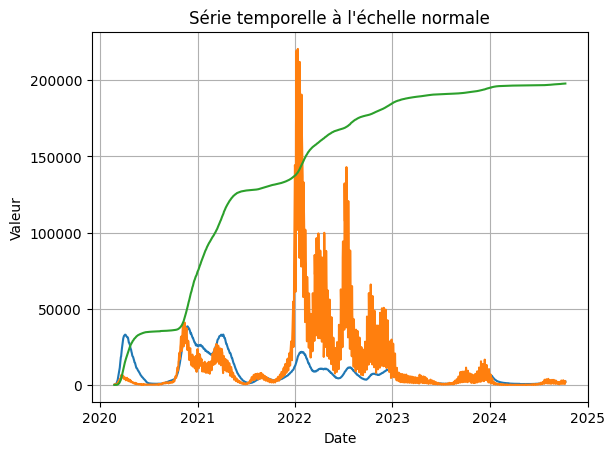

In [ ]:
plt.plot(df1)
plt.title('Série temporelle à l\'échelle normale')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.grid(True)
plt.show()

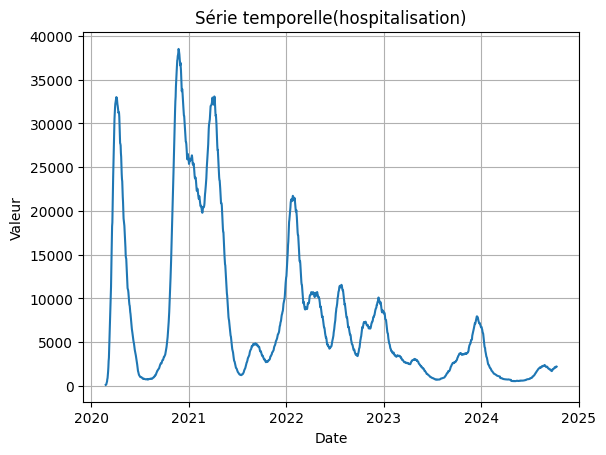

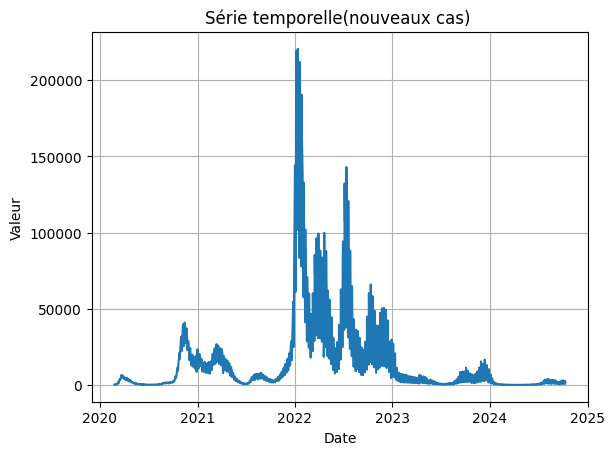

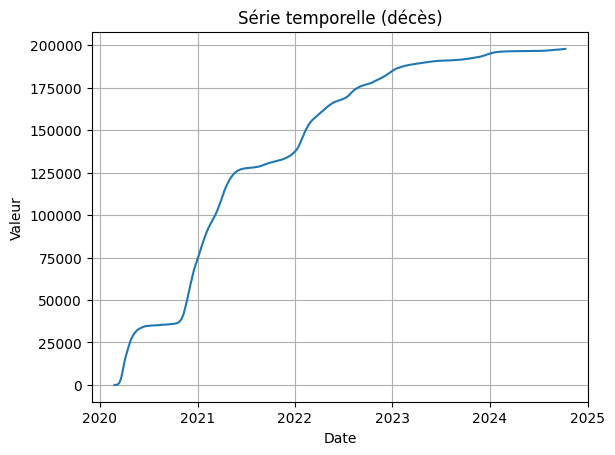

In [ ]:
plt.figure()
plt.plot(df1['total_hospitalized'])
plt.title('Série temporelle(hospitalisation)')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(df1['new_positives'])
plt.title('Série temporelle(nouveaux cas) ')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(df1['décès'])
plt.title('Série temporelle (décès)')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.grid(True)
plt.show()


Tracer la série temporelle à l'échelle logarithmique

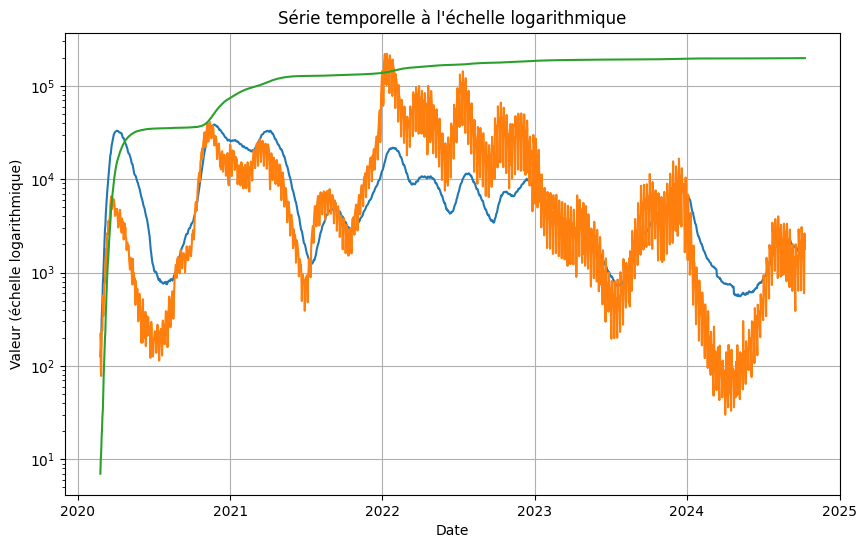

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df1)
plt.yscale('log')  # Définir l'échelle y sur logarithmique
plt.title('Série temporelle à l\'échelle logarithmique')
plt.xlabel('Date')
plt.ylabel('Valeur (échelle logarithmique)')
plt.grid(True)
plt.show()

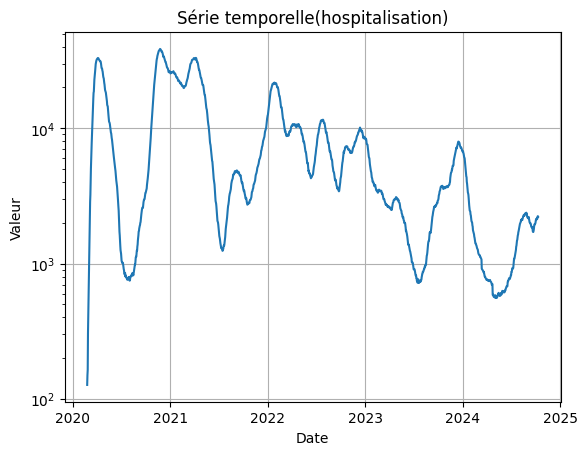

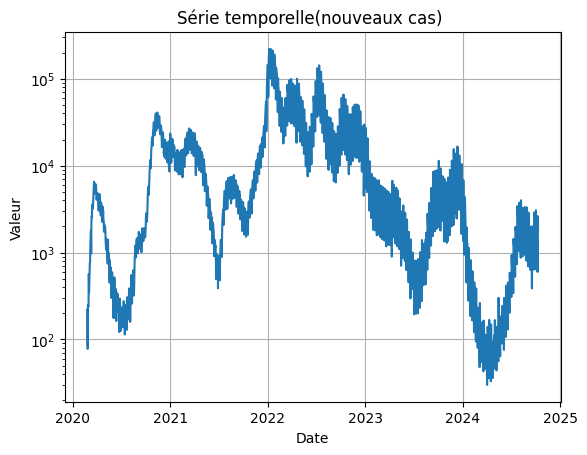

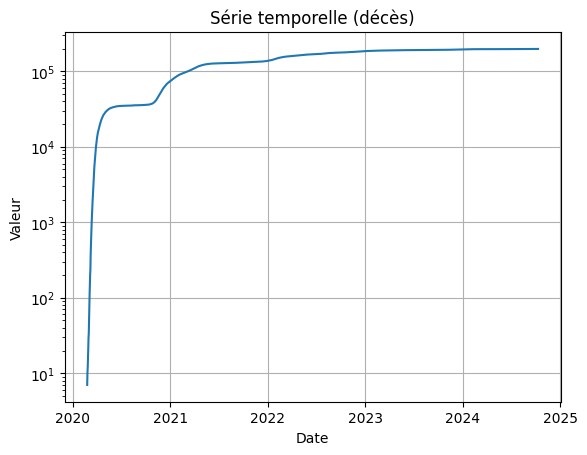

In [ ]:
# visualisons de anière separer
plt.figure()
plt.plot(df1['total_hospitalized'])
plt.yscale('log')  # Définir l'échelle y sur logarithmique
plt.title('Série temporelle(hospitalisation)')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(df1['new_positives'])
plt.yscale('log')  # Définir l'échelle y sur logarithmique
plt.title('Série temporelle(nouveaux cas) ')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(df1['décès'])
plt.yscale('log')  # Définir l'échelle y sur logarithmique
plt.title('Série temporelle (décès)')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.grid(True)
plt.show()
